# remember to rewrite this shit
## need someone to help with NA


In [3]:
# get the dir
getwd()
# set the dir
setwd('/home/senlyu/case/data')

[1] "/home/senlyu/case"

In [4]:
# get the data
train.file <- paste0('/home/senlyu/case/data/', 'training.csv')
data <- read.csv(train.file, stringsAsFactors=F)

In [5]:
# random all the data
data_new = data[sample(nrow(data),size=dim(data)[1],replace=TRUE),]
# get a look at our dataset
head(data_new)

In [6]:
# train-validation-test split
# both validation, test are set to 700
# be careful with the len
train.len = dim(data_new)[1]-1400
validation.len = 700
test.len = 700
to.train = data_new[1:train.len,]
to.validation = data_new[(train.len+1):(train.len+validation.len),]
to.test = data_new[(train.len+validation.len+1):(train.len+validation.len+test.len),]

In [7]:
# change the data into good form
# im.train[i,j,k] = the value of, the number i image, the j row, the k col
# or you can see it in this way. number i image is in im.train[i,,]

# the traget is lb.train
# the each feature has (x,y). 
# for each i image, j feature, x=lb.train[i,2*j-1], y=lb.train[i,2*j]

In [8]:
trainimage = to.train$Image
to.train$Image = NULL
lb.train = to.train
im.train = array(0,dim = c(length(trainimage),96,96))
for (i in (1:length(trainimage)))
{
    im.intlize = as.integer(unlist(strsplit(trainimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.train[i,j,k] = im.add[j,k]
        }
    
}

In [14]:
validationimage = to.validation$Image
to.validation$Image = NULL
lb.validation = to.validation
im.validation = array(0,dim = c(length(validationimage),96,96))
for (i in (1:length(validationimage)))
{
    im.intlize = as.integer(unlist(strsplit(validationimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.validation[i,j,k] = im.add[j,k]
        }
    
}

In [15]:
testimage = to.test$Image
to.test$Image = NULL
lb.test = to.test
im.test = array(0,dim = c(length(testimage),96,96))
for (i in (1:length(testimage)))
{
    im.intlize = as.integer(unlist(strsplit(testimage[i], " ")))
    im.add = matrix(data=rev(im.intlize),nrow=96,ncol=96)
    for (j in 1:96)
        for (k in 1:96)
            {
            im.test[i,j,k] = im.add[j,k]
        }
    
}


In [16]:
# here are the examples of all three images and oen feature

In [1]:
# no_image: number of image
no_image = 1
# get each sample from all three dataset
imtrain = matrix(im.train[no_image,,],nrow = 96, ncol = 96)
imvalidation = matrix(im.validation[no_image,,],nrow = 96, ncol = 96)
imtest = matrix(im.test[no_image,,],nrow = 96, ncol = 96)

ERROR: Error in matrix(im.train[1, , ], nrow = 96, ncol = 96): object 'im.train' not found


[1] 32.33563

[1] 59.74265

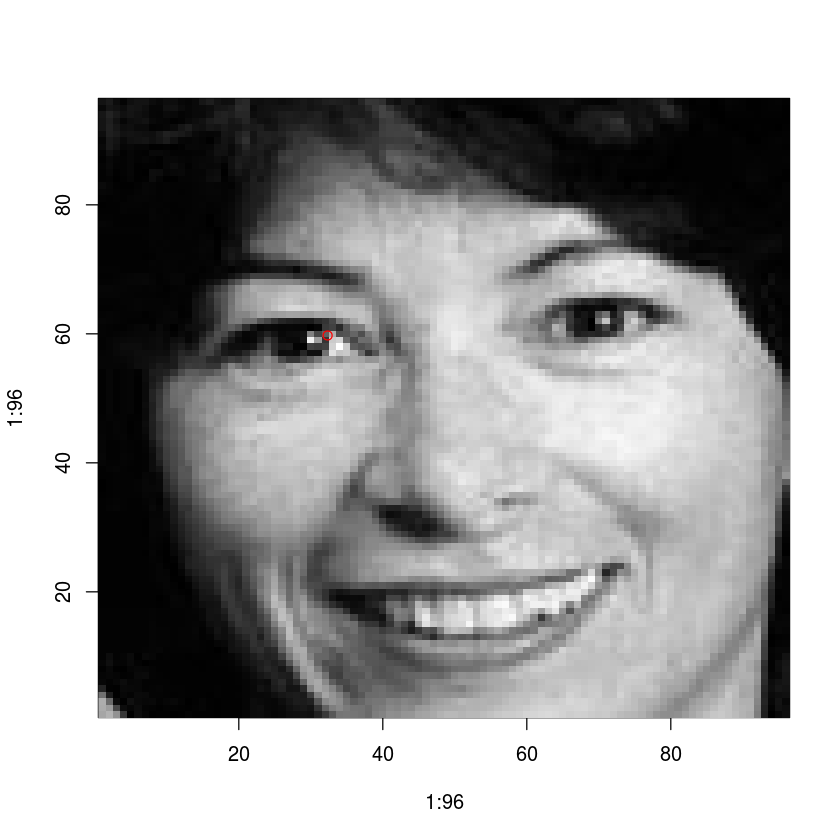

In [18]:
# show the data

# change j to show the position of different features
j = 1
image(1:96,1:96,imtrain,col=gray((0:255)/255))
points(96-lb.train[no_image,2*j-1],         96-lb.train[no_image,2*j],         col="red")
# why 96- ?? because the raw data is store in this way
96-lb.train[no_image,1]
96-lb.train[no_image,2]

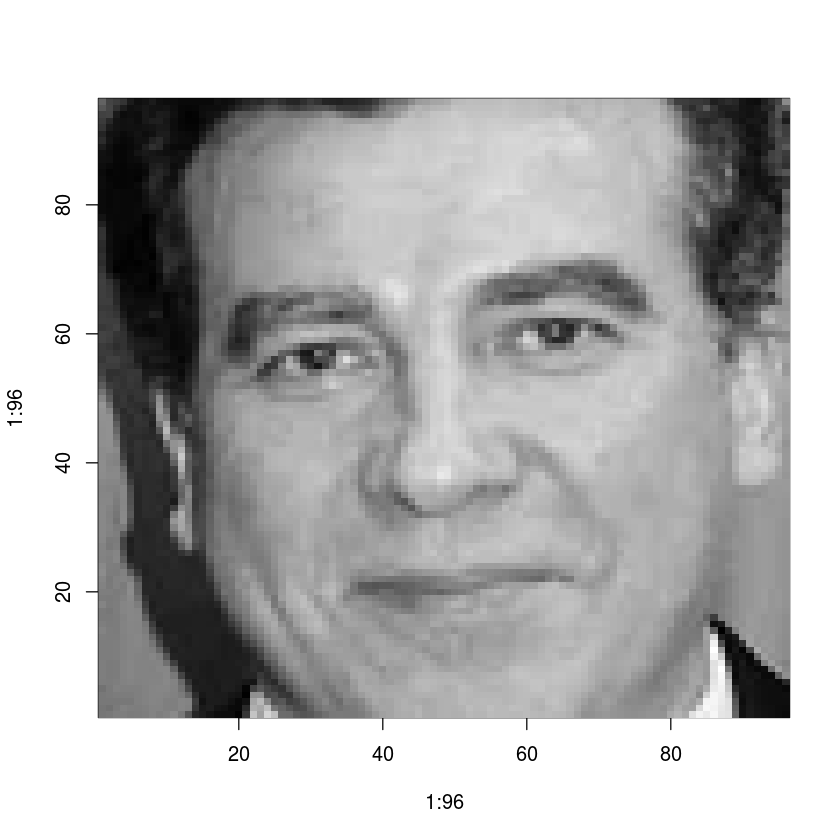

In [19]:
image(1:96,1:96,imvalidation,col=gray((0:255)/255))

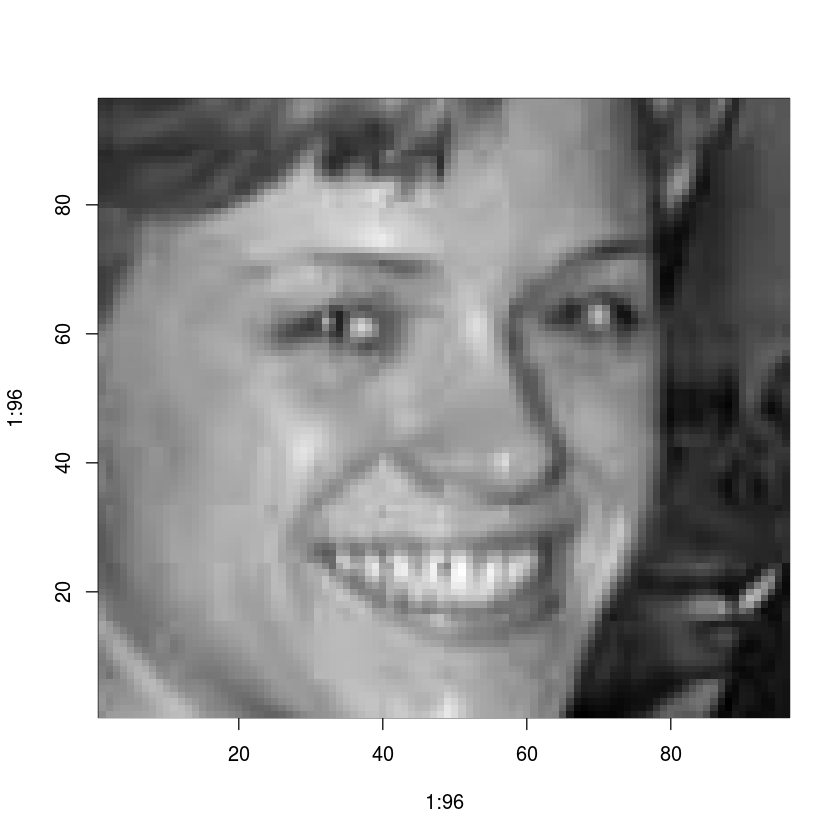

In [20]:
image(1:96,1:96,imtest,col=gray((0:255)/255))

In [21]:
# save the data

In [22]:
save(im.train, lb.train, im.validation, lb.validation, im.test, lb.test, file = 'newdata.Rd')

In [23]:
load('newdata.Rd')

In [24]:
# this is get the 21*21 sqaure
# matrixoffeature is a 4-dimensional array
# for the image i, feature j, the 21*21 feature part are in the matrixoffearture[i,j,,]

# if the postion_x or y is out of range, we set it to NA
# if the lb.train[i,j] is NA then we set matrixoffearture[i,j,,] also NA

In [25]:
matrixoffeature = array(0,dim=c(dim(lb.train)[1], dim(lb.train)[2]/2, 21, 21))

for (i in 1:(dim(lb.train)[1])){
    for (j in 1:(dim(lb.train)[2]/2))
        {
        for (k in 1:21)
            for (l in 1:21){
                postion_x = 96 - round(lb.train[i,2*j-1] - k + 11)
                postion_y = 96 - round(lb.train[i,2*j] - l + 11)
                flag = (postion_x<1)|(postion_x>96)|(postion_y<1)|(postion_y>96)
                if (is.na(postion_x)|is.na(postion_y)){
                        flag = TRUE
                }
                if (is.na(flag)) {
                    matrixoffeature[i,j,k,l] = NA
                }else if (flag){
                    matrixoffeature[i,j,k,l] = NA
                    } else {
                    matrixoffeature[i,j,k,l] = im.train[i,postion_x,postion_y]
                }
            }
        }
}
    


In [26]:
# this is how this dataset will look like
matrixoffeature[1,1,,]

140,71,45,88,118,139,125,112,107,103,⋯,88,96,87,42,51,76,54,59,57,38
73,87,112,106,100,115,98,96,82,107,⋯,76,98,89,50,18,66,54,65,71,62
109,152,120,95,103,85,69,48,50,61,⋯,77,67,58,54,21,40,61,53,68,82
176,131,126,108,104,78,66,45,21,29,⋯,59,63,62,62,43,19,33,51,36,96
164,140,119,104,91,84,63,45,15,10,⋯,52,62,58,58,61,30,18,13,21,103
147,141,109,88,79,80,62,37,35,15,⋯,29,58,67,56,57,35,12,7,58,139
132,132,100,92,76,73,57,37,43,23,⋯,6,44,69,66,34,17,26,16,85,163
138,133,103,81,64,68,51,40,46,26,⋯,0,28,60,64,14,8,30,16,84,151
136,123,96,73,69,67,46,46,46,18,⋯,0,23,60,40,1,7,29,26,98,171
148,118,76,64,72,64,47,49,47,18,⋯,0,17,53,20,0,3,39,25,87,182
152,129,87,60,66,69,51,50,44,16,⋯,0,10,35,10,0,7,39,49,100,185


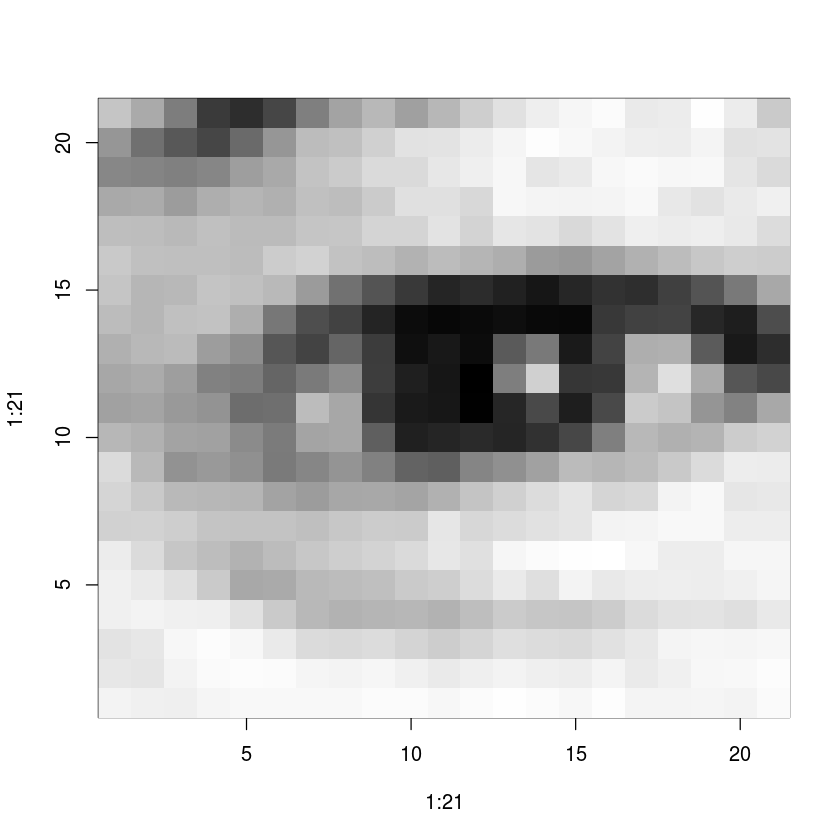

In [27]:
# this is one feature of one image
no_image = 3 # no of image
no_feature = 2 # no of feature
im = matrix(matrixoffeature[no_image,no_feature,,],nrow = 21, ncol = 21)
image(1:21,1:21,im,col=gray((0:255)/255))

In [ ]:
# save the big matrixoffeature

In [28]:
save(matrixoffeature,file='matrix.Rd')

In [29]:
load('matrix.Rd')

In [30]:
# this is our average feature
# get the mean_f[j]
# mean_f[j,,] is 21*21 part of the mean of all the feature j
# if matrixoffeature[i,j,,] is not NA, we add to get the mean_f[j,,]

In [31]:
j_len = dim(lb.train)[2]/2
mean_f = array(0, dim=c(j_len,21,21))
for (j in (1:j_len))
    {
    for (ii in 1:21)
        for (jj in 1:21){
            mean_f[j,ii,jj] = 0
        }
    for (i in 1:(dim(lb.train)[1])){
        for (k in 1:21)
            for (l in 1:21){
                if (!is.na(matrixoffeature[i,j,k,l])){
                    mean_f[j,k,l] = mean_f[j,k,l]*(i-1)/i+matrixoffeature[i,j,k,l]/i
                }
                
            }
        
    }
}


In [ ]:
# save the average features

In [32]:
save(mean_f,file='meanfeatures.Rd')

In [33]:
load('meanfeatures.Rd')

In [34]:
# this is for you to see how the feature is
# change the featurenum u like to see the average feature

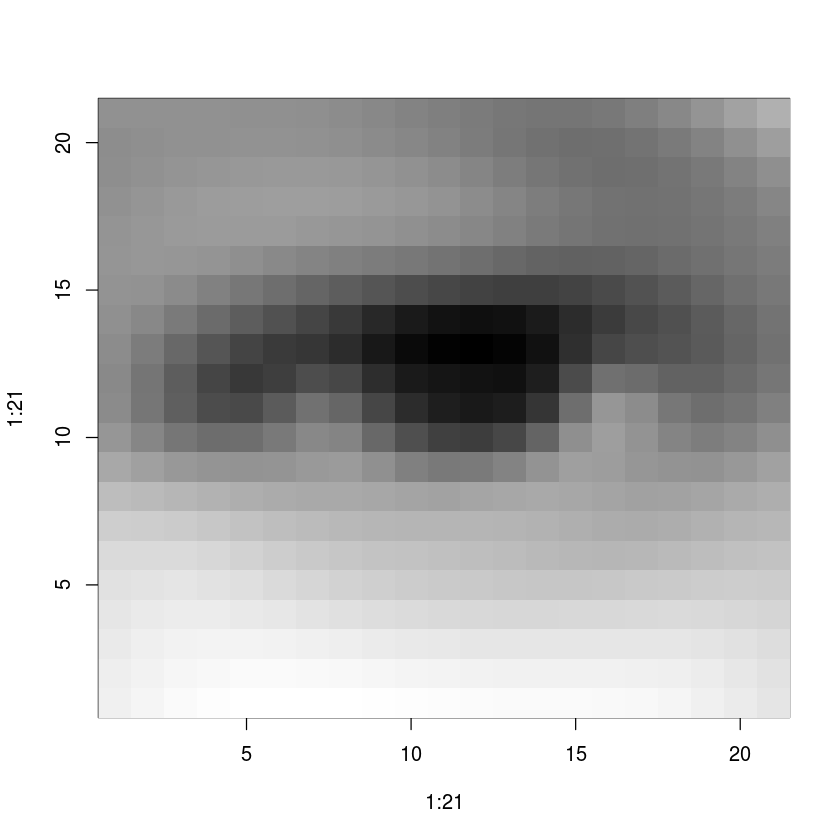

In [35]:
featurenum = 1
im = matrix(mean_f[featurenum,,],nrow = 21, ncol = 21)
image(1:21,1:21,im,col=gray((0:255)/255))

In [7]:
# this is the compare function
# use to compare two 21*21 parts, to see how similiar of each other
# compare one feature in a image with the mean feature
# normalize all features
# set NA as -999
# remember the less the score function is more similiar
comparefeatures = function(a,b){
    maxa = max(a)
    mina = min(a)
    maxb = max(b)
    minb = min(b)
    newa = (a - maxa)/(maxa-mina)
    newb = (b - maxb)/(maxb-minb)
    score = sum((newa-newb)^2)
    if (is.na(score)) {
        score = -999
    }
    return(score)
}
# this is for test the compare function
a = c(1,NA,3)
b = c(100,101,102)
comparefeatures(a,b)

[1] -999

In [8]:
# this is the prediction function
# we use cor to get score and return the highest score
predictions = function(image, featurenumber){
    dimx = dim(image)[1]
    dimy = dim(image)[2]
    maxscore = -9999999999
    maxx = 0
    maxy = 0
    
    for (i in (1:(dimx-21)))
        for (j in (1:(dimy-21))){
            compareimage = image[i:(i+20),j:(j+20)]
            A = as.vector(mean_f[featurenumber,,])
            B = as.vector(compareimage[,])
            #la = length(A)
            #lb = length(B)
            #score = cor(A,B)
            score = -comparefeatures(A,B)
            if (score > maxscore) {
                maxscore = score
                maxx = i
                maxy = j
            }
            
        }
    
    return(c(maxscore,maxx,maxy))
    #return(c(la,lb))
    
}

[1] -5.220035

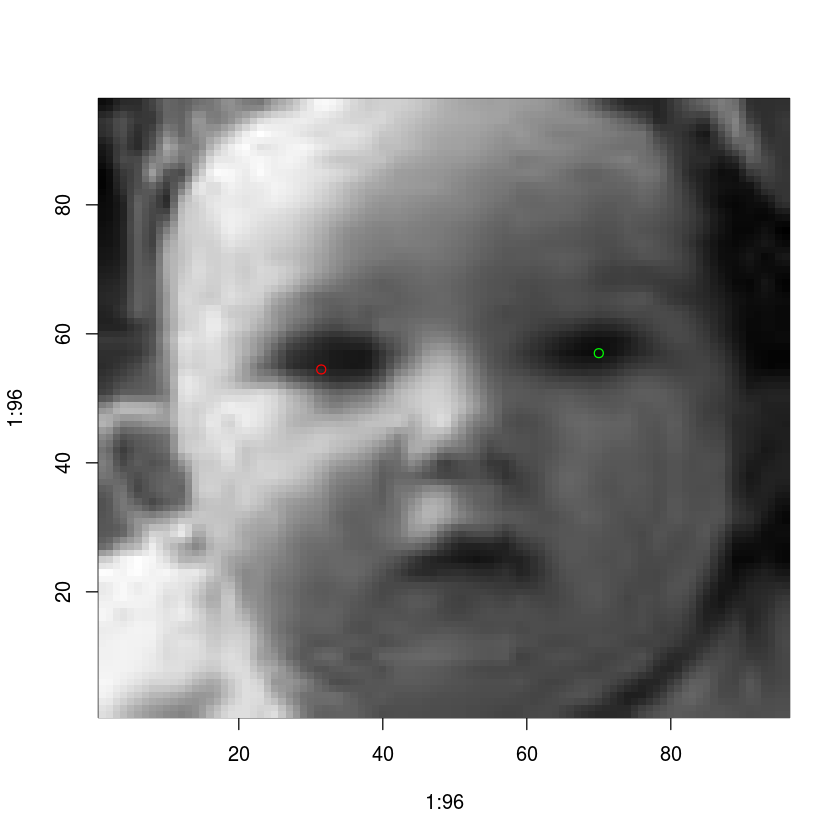

In [82]:
# this is how our banchmarks works
# change the numofpci as the different pic in the test dataset
# change the feature u want to test
# the red is label
# the green is prediction
numofpci = 90
numoffeature = 1
im = matrix(im.test[numofpci,,],nrow = 96, ncol = 96)
image(1:96,1:96,im,col=gray((0:255)/255))
points(96-lb.test[numofpci,2*numoffeature-1],         96-lb.test[numofpci,2*numoffeature],         col="red")
p = predictions(im.test[numofpci,,],numoffeature)
a = c(p[2]+11,p[3]+11)
points(a[1],         a[2],         col="green")
p[1]

In [12]:
# this is I tried matrix adding and muilply
# the basic calculation of matrixs
a = c(1,2,3,3,2,1)
b = c(3,2,1,1,2,3)
A = array(a,dim=c(3,2))
B = array(b,dim=c(3,2))
A*B
t(B)
A - B
(A-B)^2
sum((A-B)^2)
A%*%t(B)

3,3
4,4
3,3


3,2,1
1,2,3


-2,2
0,0
2,-2


4,4
0,0
4,4


[1] 16

6,8,10
8,8,8
10,8,6


In [59]:
# this is a new start
# before this we have all the data cleaned
# And we have a benchmark model
# from this we will have a new model
setwd('/home/senlyu/case/data')
load('newdata.Rd')
load('matrix.Rd')
load('meanfeatures.Rd')
mean_f = mean

In [3]:
# store the dimension
dims = dim(matrixoffeature)
dims

[1] 5649   15   21   21

In [4]:
# get the scores as our inputs of the model
# we set featureno as 1 for the frist feature, should be 15
getscore = function(image){
    dimx = dim(image)[1]
    dimy = dim(image)[2]
    featureno = 1
    score = matrix(nrow=(dimx-21)^2,ncol=featureno)
    for (j in 1:featureno){
        maxscore = -9999999999
        maxx = 0
        maxy = 0
        for (l in (1:(dimx-21)))
            for (k in (1:(dimy-21))){
                compareimage = image[l:(l+20),k:(k+20)]
                A = as.vector(mean_f[j,,])
                B = as.vector(compareimage[,])
                #la = length(A)
                #lb = length(B)
                #score = cor(A,B)
                score[(l-1)*(dimx-21)+k,j] = -comparefeatures(A,B)
                if (!is.na(score[(l-1)*(dimx-21)+k,j])) {
                    if (score[(l-1)*(dimx-21)+k,j] > maxscore) {
                        maxscore = score[(l-1)*(dimx-21)+k,j]
                        maxx = l
                        maxy = k
                    }
                }
                
            
        }
    }
    return(score)
}



In [10]:
# get the y as our targets of the model
getthey = function(y){
    v1 = NULL
    v2 = NULL
    y = as.vector(y)
    featureno = 1
    for (i in 1:featureno){
        v1 = c(v1,y[i*2-1])
        v2 = c(v2,y[i*2])
    }
    aa = matrix(0,nrow=2,ncol=1)
    y = rbind(v1,v2)
    for (i in 1:2)
        for (j in 1:1){
            aa[i,j] = as.numeric(y[i,j])
    }
    return(aa)
}
#getthey(c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30))


In [11]:
# remember to check dimension of the matrixs before you do matrix calculation
# remember to run the camparefunction before this and the prediction function
dim(getscore(im.test[1,,]))
dim(getthey(lb.train[1,]))

[1] 5625    1

[1] 2 1

In [12]:
# this should be a standaraztion function of all data, but I didnt use it 
stan_all_f = function(m){
    m_new = m
    for (j in 1:dims[2]){
        means = array(0, dim=c(dims[1],dims[3],dims[4]))
        sds = array(0, dim=c(dims[1],dims[3],dims[4]))
        for (k in 1:dim[3])
            for (l in 1:dim[4]){
                means[i,k,l] = mean(m[,j,k,l])
                sds[i,k,l] = sd(m[,j,k,l])
            }
        for (i in 1:dim[1])
            for (k in 1:dim[3])
                for (l in 1:dim[4]){
                    m_new[i,j,k,l] = (m[i,j,k,l] - means[i,k,l])/sds[i,k,l]
                }
    }
    return(m_new)
        
       
}

In [13]:
# train
# W is hori inputs is ver y is v
# y_pred = W*inputs
# error = 1/2*sum((target -y_pred)^2)
# sums = alpha*(target - y_pred)*inputs'
# W = W - sums

In [14]:
# because the scale of the score function and our targets, the learning rate of our model is fucking low
# I store the cost in cost[i], should be decreasing. and this is global variable and actually we dont have to do that

trainmodel = function(inputs,target,alpha,W,i){
    y_pred = W %*% inputs
    error = 1/2*(target - y_pred)%*%t((target - y_pred))/2
    cost[i] <<- sum(error)
    sums = 0.001*alpha*(y_pred - target) %*% t(inputs)/2
    W = W - sums
    return(W)
}

In [ ]:
# this is for single point test
# to see whether the error is decreasing
# remember if the error is not decreasing your model is not learning

In [15]:
W = matrix(0,nrow = 2,ncol = 5625)

In [342]:

alpha = 0.000001
i = 10 # change the i your self for single point test
inputs = getscore(im.train[i,,])
target = getthey(lb.train[i,])
y_pred = W %*% inputs
error = 1/2*(target - y_pred)%*%t((target - y_pred))/2
sums = alpha*(y_pred-target) %*% t(inputs)/2
W = W - sums
W
error
y_pred

-0.0006447553,-0.0006486369,-0.0006361239,-0.0006090312,-0.0005727999,-0.0005661007,-0.0005605504,-0.0005551275,-0.0005501388,-0.0005678836,⋯,-0.0001744913,-0.0001769649,-0.0001721634,-0.0001669665,-0.0001549933,-0.0001775283,-0.0001615601,-0.0001166305,-5.992432e-05,-5.315822e-05
-0.0003351636,-0.0003323953,-0.0003244809,-0.0003101375,-0.0002900275,-0.0002850564,-0.0002819454,-0.0002784150,-0.0002768326,-0.0002803209,⋯,-0.0001415300,-0.0001428395,-0.0001377366,-0.0001384813,-0.0001351582,-0.0001348179,-0.0001296698,-0.0001147675,-9.428310e-05,-9.235902e-05


11.84965,8.71949
8.71949,6.41618


63.10514
34.41553


In [16]:
# get_predict
runmodel = function(inputs){
    y_pred = W %*% inputs
    return(y_pred)
}


In [17]:
# accuracy
# never used
costf = function(y_pred,y){
    return((y_pred['x'] == y['x']) & (y_pred['y'] == y['y']))
}

In [18]:
# the fucking NA becoming a problem when we do matrix muiltiply
# need someone to help to deal with the fucking NAs
isnotna =function(a){
    flag = TRUE
    for (i in dim(a)[1]){
        for (j in dim(a)[2]){
            if (is.na(a[i,j])) {
                flag = FALSE
                return(flag)
            }
        }
    }
    return(flag)
}

In [67]:
# get the scores
# seperate the inputs into batchs
W = matrix(0.001,nrow = 2,ncol = 5625)# set to be small
inum = 5600 # total number to train
assign("cost", matrix(0,nrow=inum,ncol=1), envir = .GlobalEnv) # this is for global variable
alpha = 1e-06
# train one by one
for (i in (1:inum)){
    inputx = getscore(im.train[i,,])
    target = getthey(lb.train[i,])
    if (isnotna(target)) {
        W = trainmodel(inputx,getthey(lb.train[i,]),alpha,W,i)
    }
    
    
}
# get the final weights
W
# get the cost
cost



-0.0005228201,-0.0005143706,-0.0005024585,-0.0004916749,-0.0004805410,-0.0004736444,-0.0004664993,-0.0004605001,-0.0004413388,-0.0004252870,⋯,-0.0003683067,-0.0003725884,-0.0003757596,-0.0003801393,-0.0003839489,-0.0003893601,-0.0003992441,-0.0004002317,-0.0004042412,-0.0004144476
-0.0003585915,-0.0003538409,-0.0003449360,-0.0003374007,-0.0003307162,-0.0003274106,-0.0003248295,-0.0003225737,-0.0003104744,-0.0003008704,⋯,-0.0002479432,-0.0002500823,-0.0002519272,-0.0002560631,-0.0002609426,-0.0002687822,-0.0002806718,-0.0002813176,-0.0002858445,-0.0002960932


216049.03
218523.20
157225.01
101386.24
100158.53
100503.18
177506.26
118660.89
91799.80
93562.81
93070.25


In [68]:
# save the model
nameofmodel = paste(c("alpha-",alpha,"num-",i,".Rd"),collapse = '')
nameofmodel
save(W,cost,i,alpha,file=nameofmodel)

[1] "alpha-1e-06num-5600.Rd"

In [71]:
# load and check the model
alpha = 1e-06
i = 5600
nameofmodel = paste(c("alpha-",alpha,"num-",i,".Rd"),collapse = '')
load(nameofmodel)
W
cost
i
alpha

-0.0005228201,-0.0005143706,-0.0005024585,-0.0004916749,-0.0004805410,-0.0004736444,-0.0004664993,-0.0004605001,-0.0004413388,-0.0004252870,⋯,-0.0003683067,-0.0003725884,-0.0003757596,-0.0003801393,-0.0003839489,-0.0003893601,-0.0003992441,-0.0004002317,-0.0004042412,-0.0004144476
-0.0003585915,-0.0003538409,-0.0003449360,-0.0003374007,-0.0003307162,-0.0003274106,-0.0003248295,-0.0003225737,-0.0003104744,-0.0003008704,⋯,-0.0002479432,-0.0002500823,-0.0002519272,-0.0002560631,-0.0002609426,-0.0002687822,-0.0002806718,-0.0002813176,-0.0002858445,-0.0002960932


216049.03
218523.20
157225.01
101386.24
100158.53
100503.18
177506.26
118660.89
91799.80
93562.81
93070.25


[1] 5600

[1] 1e-06

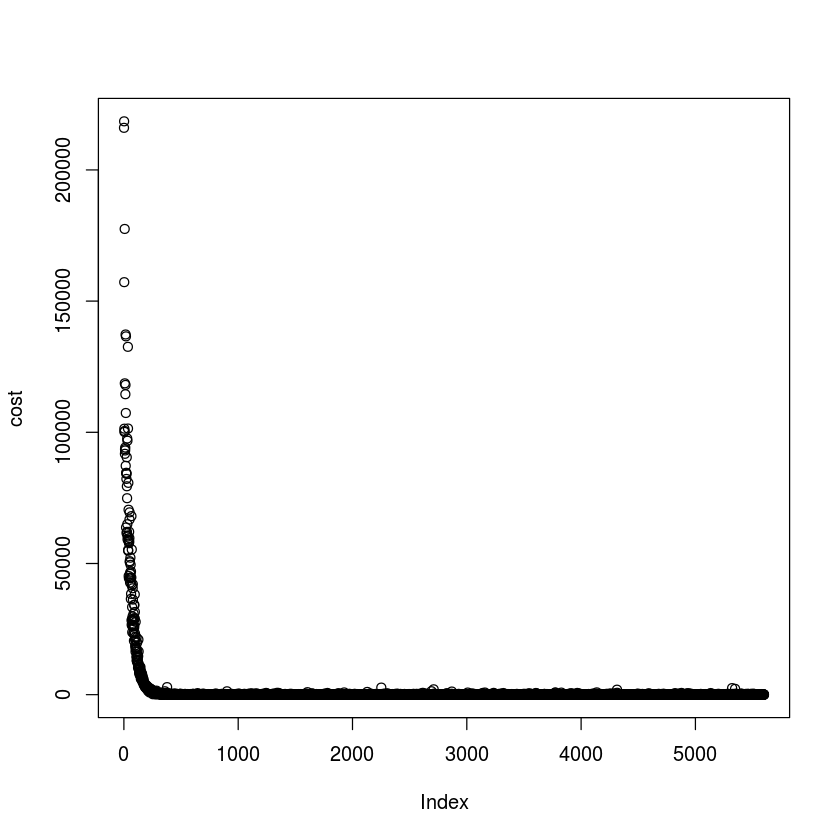

In [72]:
plot(cost)

# if cost is not decreasing in the plot
        lessen your fking learning rate, the variable alpha
## if decreasing learning rate is not useful
        give up this shit

In [451]:
#  compare the model with benchmark
tno = 700
model1 = 0
model2 = 0
for (i in (1:tno)){
    p_model1 = c(96-predictions(im.test[i,,],1)[2],96-predictions(im.test[i,,],1)[3])
    p_model2 = runmodel(getscore(im.test[i,,]))
    model1_add = (lb.test[i,1]-p_model1[1])^2+(lb.test[i,2]-p_model1[2])^2
    model2_add = (lb.test[i,1]-p_model2[1])^2+(lb.test[i,2]-p_model2[2])^2
    if (!is.na(model1_add)&&!is.na(model2_add)){
        model1 = model1 + model1_add
        model2 = model2 + model2_add
    }
    
}
model1 # this is benchmark
model2 # model2 should be much better in my test is 5 times less

[1] 573036.5

[1] 116144.7

In [410]:
# this is for test
no = 200
a = runmodel(getscore(im.test[no,,]))
a[1] - lb.test[no,1]
a[2] - lb.test[no,2]


[1] -4.923985

[1] -1.878819

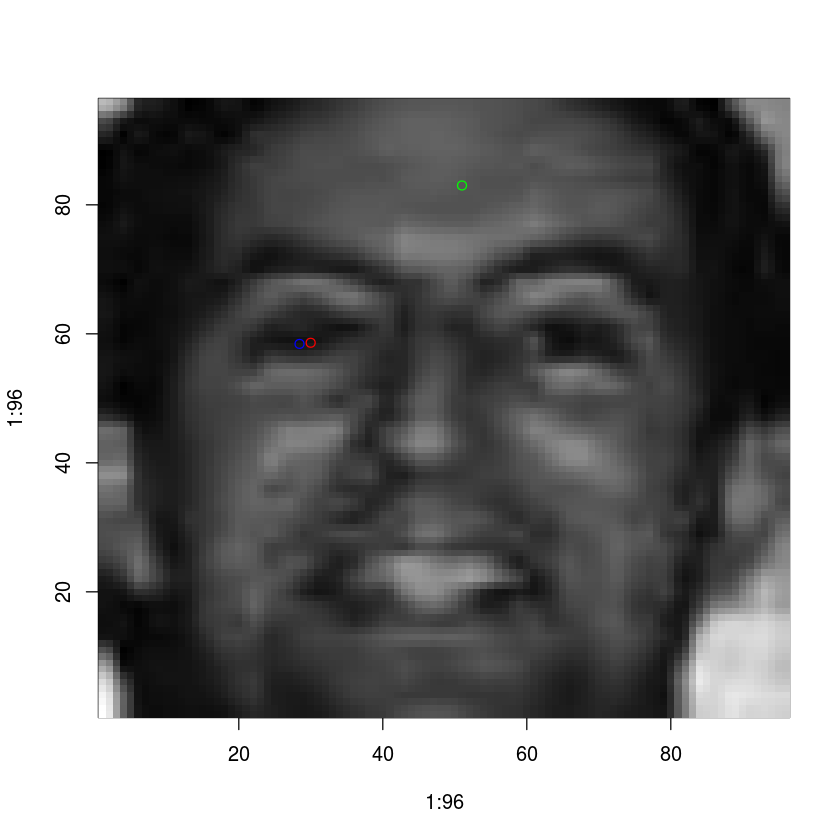

In [78]:
#  compare the model with benchmark in virtal
numofpci = 3
numoffeature = 1
im = matrix(im.test[numofpci,,],nrow = 96, ncol = 96)
image(1:96,1:96,im,col=gray((0:255)/255))
points(96-lb.test[numofpci,2*numoffeature-1],         96-lb.test[numofpci,2*numoffeature],         col="red")
p = predictions(im.test[numofpci,,],numoffeature)
a = c(p[2]+11,p[3]+11)
points(a[1],         a[2],         col="green")
p_new = runmodel(getscore(im.test[numofpci,,]))
points(96-p_new[1],         96-p_new[2],         col="blue")